# _Face recognition_

## 1. Task description

You will work on a face recognition task. The provided dataset includes face images of 40 subjects. There are a total of 400 images, with 10 images per subject. Each image contains 32×32=1024 pixels, with 256 grey levels per pixel.

## 2. Preparation

### Setting up

The functions that you need are defined in the source file we have provided you with. To use them you must import it first:

In [1]:
from lab3lib import load_data, show_single_face, show_faces, partition_data, split_left_right, join_left_right, show_split_faces
import numpy as np

Now you can load the data:

In [2]:
data, labels = load_data()

### Visualising the dataset

You can observe the faces stored in a data matrix by using the functions `show_single_face()` and `show_faces()`.

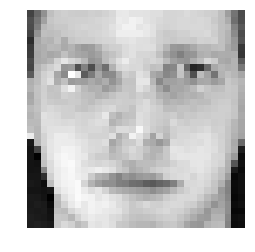

In [3]:
# Display a single example.
show_single_face(data[0, :])

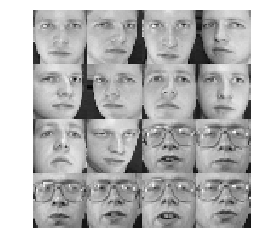

In [4]:
# Display the first 16 examples in a 4x4 grid.
show_faces(data[:16, :], num_per_row=4)

### Splitting into train and test set

A data partition function is supplied to facilitate your experiments. It randomly splits the provided data into the training and test sets, where the training set contains $N$ samples per class and the test set contains
the remaining samples. It takes the labels and the specified number $N$ as the input. It returns the sample indices in the training and test set. For example, the following code divides a given set of 400 samples into a training set containing 3 samples per subject and a test set containing 7 samples per subject:

In [5]:
tr_ind, te_ind = partition_data(labels, num_per_class=3)
tr_data = data[tr_ind, :]
tr_label = labels[tr_ind]
te_data = data[te_ind, :]
te_label = labels[te_ind]

## 3. $L_2$-regularised least squares implementation

Now, you will need to implement the function `l2_rls_train` below. It should train a linear model by minimising the $L_2$-regularised sum of squares loss using the normal equations (this is called $L_2$*-regularised least squares model*, or *ridge regression model*). It should support both single-output and multi-output cases. This function should take a set of training samples and a user-specified regularisation parameter $\lambda$ as the input, and return the predicted weights.

In [6]:
def l2_rls_train(tr_data, tr_labels, λ# Add any other arguments here
                ):
    """
    A summary of your function goes here.

    data: type and description of "data"
    labels: type and description of "labels"

    Returns: type and description of the returned variable(s).
    """
    
    # This is just to be consistent with the lecture notes.
    X, y = tr_data, tr_labels
    
    # Expand X with a column of ones.
    column = np.ones((X.shape[0],1))
    X_tilde = np.concatenate((column, X), axis=1)
    
    # Compute the coefficient vector.
    I = np.eye((X_tilde.shape[1]))
    w = np.linalg.pinv(X_tilde.T @ X_tilde + λ * I) @ X_tilde.T @ y
    
    # Return model parameters.
    return w
print(l2_rls_train(tr_data, tr_label, 0))
print(tr_label)

[ 0.00036086 -0.00402177  0.00570871 ...  0.00574503  0.01440951
  0.0074522 ]
[ 1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7  8  8  8
  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15 16 16 16
 17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 22 23 23 23 24 24 24
 25 25 25 26 26 26 27 27 27 28 28 28 29 29 29 30 30 30 31 31 31 32 32 32
 33 33 33 34 34 34 35 35 35 36 36 36 37 37 37 38 38 38 39 39 39 40 40 40]


Once you have trained your model, you can use it on to predict new data. Implement the following function to do this.

In [7]:
def l2_rls_predict(w, data # Add any other arguments here
                  ):
    """
    A summary of your function goes here.

    data: type and description of "data"

    Returns: type and description of the returned variable(s).
    """
    
    # This is just to be consistent with the lecture notes.
    X = data
    
    # Your code goes here
    column = np.ones((X.shape[0],1))
    X_tilde = np.concatenate((column, X), axis=1)
    predicted_y = X_tilde @ w
    
    return predicted_y
print(l2_rls_predict(l2_rls_train(tr_data, tr_label, 0), te_data))

[ 6.6324263   9.28363595  3.60384474 10.61697629  2.18678678  9.96829616
  8.7019085  11.26937456 -6.83926817 12.48837076  1.62900964 11.58791075
  0.43415001  9.24130408 25.73438542 17.42876368 19.90757269 19.38340086
 13.12269652 24.93133725  9.98233078 -5.86580949 13.48028558 11.63099492
  6.69765793  8.00482735  8.34360842  1.29876492  7.77797938 22.73673475
 31.29355901  7.39148126 15.36741322 14.06135369 25.12733911 25.41431969
 25.14887522 25.25362315 22.83807463  9.7886434   9.00123741  6.26020329
 22.39370048 19.71632771 24.62589942  6.66106777 27.38754123 20.16318074
 48.29541179 29.42477512 36.66510066 14.95045032 27.99949209 13.3504546
  4.688428   19.16401484 13.18104457 22.37259317 10.55525305  7.06523449
 13.76912159 22.59548957 13.19569371 19.17577697 13.9785449  20.35874149
 12.26526705 12.45650953 16.70418815  7.28728079 19.34273788 15.81055484
 14.15810996 23.00493508 12.30022526  6.0767697  15.63882825  8.22569376
 16.22505566 13.03838785 -1.09528132 11.5440558   5.

## 4. Experiments

Start to use your functions `l2_rls_train` and `l2_rls_predict` to perform the following experiments.

### Experiment 1: Binary Classification

Start with a binary classification task to classify face images for subjects “1” and “30”.

Train three classifiers:
1. Set $y=-1$ for samples from “1” and $y=+1$ for samples from “30” to train a linear model, and use the threshold $T= 0$ to obtain the class prediction.
2. Set $y=0$ for samples from “1” and $y=1$ for samples from “30” to train a linear model, and use the threshold $T= 0.5$ to obtain the class prediction.
2. Set $y=1$ for samples from “1” and $y=30$ for samples from “30” to train a linear model, and use the threshold $T= 15.5$ to obtain the class prediction.

Randomly select 3 images per subject for training, and use the remaining images for testing. Train your classifier 1 and test it with a fixed regularisation parameter $\lambda$=0. Repeat this process 50 times and record the training and test errors.

In [8]:
def exp1(label_class_1, label_class_30):
    # Map the labels and partition the data
    #tr_ind, te_ind = partition_data(np.concatenate(labels[0:3], labels[290:293]), num_per_class=3)
        #tr_data, tr_labels, te_data, te_labels = ...    
        
    tr_ind, te_ind = partition_data(labels, num_per_class=3)
    tr_data = data[tr_ind, :]
    te_data = data[te_ind, :]
    tr_data = np.concatenate((tr_data[0:3], tr_data[87:90]))
    tr_label = np.concatenate((labels[0:3], labels[290:293]))
    te_data = np.concatenate((te_data[0:7], te_data[203:210]))
    te_label = np.concatenate((labels[3:10], labels[293:300]))
    
    tr_label = tr_label.tolist()
    te_label = te_label.tolist()
    for index in range(len(tr_label)):
        if tr_label[index] == 1:
            tr_label[index] = label_class_1
        else:
            tr_label[index] = label_class_30
            
    for index in range(len(te_label)):
        if te_label[index] == 1:
            te_label[index] = label_class_1
        else:
            te_label[index] = label_class_30
    np.array(tr_label)
    np.array(te_label)
       
    # Train your model
    w = l2_rls_train(tr_data, tr_label, 0)
    
    # Define the threshold
    T = (label_class_1 + label_class_30) / 2
    #print(T)
    
    # Perform prediction for training and compute the training error
    predicted_y = l2_rls_predict(w, tr_data)
    
    tr_err = 0
    for i in range(3):
        if(predicted_y[i] > T):
            tr_err = tr_err + 1
    for i in range(3):
        if(predicted_y[3+i] <= T):
            tr_err = tr_err + 1
    tr_err = tr_err / 6
    
    # Perform prediction for testing and compute the test error
    predicted_y2 = l2_rls_predict(w, te_data)
    te_err = 0
    for i in range(7):
        if(predicted_y2[i] > T):
            te_err = te_err + 1
    for i in range(7):
        if(predicted_y2[7+i] <= T):
            te_err = te_err + 1
            
    te_err = te_err / 14
    
    return tr_err, te_err


In [9]:
# Use the `exp1()` function to experiment with classifier 1.
# Your code goes here.
first_class_std = []
tr_err_1 = []
mean = 0
for i in range(50):    
    tr_err, te_err = exp1(-1, 1)
    mean = mean + te_err
    first_class_std.append(te_err)
    tr_err_1.append(tr_err)
    #print(tr_err)
    #print(te_err)
print("Test errors:", first_class_std)
print("Train errors:", tr_err_1)
mean = mean / 50

Test errors: [0.0, 0.21428571428571427, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.0, 0.21428571428571427, 0.07142857142857142, 0.0, 0.21428571428571427, 0.0, 0.0, 0.21428571428571427, 0.0, 0.0, 0.21428571428571427, 0.0, 0.0, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.0, 0.0, 0.0, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.0, 0.21428571428571427, 0.0]
Train errors: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Repeat the same experiment for classifier 2.

In [10]:
# Use the `exp1()` function to experiment with classifier 2.
# Your code goes here.
second_class_std = []
tr_err_2 = []
mean2 = 0
for i in range(50):    
    tr_err, te_err = exp1(0, 1)
    mean2 = mean2 + te_err
    second_class_std.append(te_err)
    tr_err_2.append(tr_err)
    #print(tr_err)
    #print(te_err)
print("Test errors:", second_class_std)
print("Train errors:", tr_err_2)
mean2 = mean2 / 50

Test errors: [0.21428571428571427, 0.0, 0.0, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.0, 0.0, 0.07142857142857142, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.0, 0.07142857142857142, 0.0, 0.07142857142857142, 0.0, 0.14285714285714285, 0.07142857142857142, 0.21428571428571427, 0.21428571428571427, 0.0, 0.14285714285714285, 0.0, 0.0, 0.0, 0.07142857142857142, 0.14285714285714285, 0.0, 0.07142857142857142, 0.0, 0.21428571428571427, 0.14285714285714285, 0.0, 0.0, 0.0, 0.07142857142857142, 0.0, 0.0, 0.0, 0.21428571428571427, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.14285714285714285]
Train errors: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Repeat the same experiment for classifier 3.

In [11]:
# Use the `exp1()` function to experiment with classifier 3.
# Your code goes here.
third_class_std = []
tr_err_3 = []
mean3 = 0
for i in range(50):    
    tr_err, te_err = exp1(1, 30)
    mean3 = mean3 + te_err
    third_class_std.append(te_err)
    tr_err_3.append(tr_err)
    #print(tr_err)
    #print(te_err)
print("Test errors:", third_class_std)
print("Train errors:", tr_err_3)
mean3 = mean3 / 50

Test errors: [0.0, 0.0, 0.21428571428571427, 0.0, 0.21428571428571427, 0.07142857142857142, 0.0, 0.0, 0.14285714285714285, 0.0, 0.07142857142857142, 0.35714285714285715, 0.0, 0.07142857142857142, 0.0, 0.21428571428571427, 0.21428571428571427, 0.14285714285714285, 0.0, 0.0, 0.07142857142857142, 0.21428571428571427, 0.0, 0.07142857142857142, 0.0, 0.14285714285714285, 0.07142857142857142, 0.07142857142857142, 0.0, 0.0, 0.07142857142857142, 0.07142857142857142, 0.0, 0.07142857142857142, 0.0, 0.21428571428571427, 0.07142857142857142, 0.14285714285714285, 0.07142857142857142, 0.14285714285714285, 0.0, 0.0, 0.07142857142857142, 0.14285714285714285, 0.21428571428571427, 0.21428571428571427, 0.0, 0.07142857142857142, 0.0, 0.0]
Train errors: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Print the test error mean and standard deviation of the three classifiers and display them in the same plot.

The mean of the first classifier is:  0.052857142857142866
The standard diviation of the first classifier is:  0.07396910551999782
The mean of the second classifier is:  0.05571428571428572
The standard diviation of the second classifier is:  0.07040698017343774
The mean of the third classifier is:  0.0785714285714286
The standard diviation of the third classifier is:  0.08718968296952645


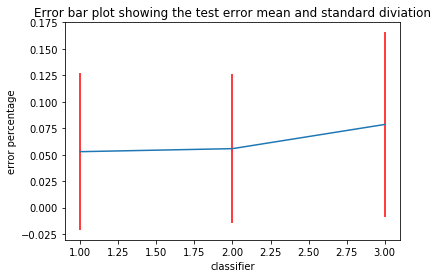

In [12]:
# Your code goes here
print("The mean of the first classifier is: ", mean)
print("The standard diviation of the first classifier is: ", np.std(first_class_std))
print("The mean of the second classifier is: ", mean2)
print("The standard diviation of the second classifier is: ", np.std(second_class_std))
print("The mean of the third classifier is: ", mean3)
print("The standard diviation of the third classifier is: ", np.std(third_class_std))
from matplotlib import pyplot as plt
y_err = []
y = []
x = np.arange(1,4)
y.append(mean)
y.append(mean2)
y.append(mean3)
plt.title('Error bar plot showing the test error mean and standard diviation')
y_err.append(np.std(first_class_std))
y_err.append(np.std(second_class_std))
y_err.append(np.std(third_class_std))
plt.errorbar(x, y, yerr = y_err, ecolor = 'r')
plt.xlabel('classifier')
plt.ylabel('error percentage')
plt.show()

Compare the three classifiers and comment on your results.

What training accuracies do you obtain with your linear classifier? Explain the reason.

Between subjects “1” and “30”, which one is more difficult for the linear classifier to recognise? Explain it.

### Experiment 2: Multi-class Classification

Now, proceed to the multi-class classification task to classify face images for all the 40 subjects. Decide an appropriate way to set your target output and make class prediction. 

Split your data to two sets: the training set contains 5 randomly selected images per subject and the test set contains the remaining images. The training set is used to train the model and select hyper-parameter $\lambda$, while the test set is only for final assessment of the trained classifier with the selected $\lambda$. 

Design an appropriate and complete machine learning experiment, which should include the training, hyper-parameter selection and evaluation stages. You can choose from the random subsampling, $k$-fold CV and LOO approaches for hyper-parameter selection. 

Write your code below and make sure it compiles. Show your code to the TA, explain your classifier and experiment design.

In [13]:
def hyperparameter_selection(tr_ind, max_lambda# Add your arguments here
                            ):
    """
    Finds the best value for lambda using some method of hyperparameter selection.
    """
    # Your code goes here
    best_lambda = 0
    least_error_rate = 1
    np.random.shuffle(tr_ind)
    tr_data = data[tr_ind, :]

    tr_label = labels[tr_ind]
    vector = np.zeros([180,40])
    testing_vector = np.zeros([20, 40])
    
    for current_lambda in range(0, max_lambda + 1, 10000):
        err_per = 0
        for i in range(10):
            vector = np.zeros([180,40])
            testing_vector = np.zeros([20, 40])
            np.random.shuffle(tr_ind)
            tr_data = data[tr_ind, :]
            tr_label = labels[tr_ind]
            te_data = data[int((len(tr_ind) / 10) * i) : int((i + 1) * (len(tr_ind) / 10))]
        
            te_label = labels[te_ind]
            middle1 = int((len(tr_ind) / 10) * i)
            middle2 = int((i + 1) * (len(tr_ind) / 10))
            tr_ind_exp = tr_ind
            for j in range(middle1, middle2, 1):
                tr_ind_exp = np.setdiff1d(tr_ind_exp, tr_ind[j]) 
            
            te_ind_exp = np.setdiff1d(tr_ind, tr_ind_exp)
            #print(te_ind_exp)
            tr_data_exp = data[tr_ind_exp]
            for k in range(180):
                #print(labels[tr_ind_exp[k]])
                vector[k - 1, labels[tr_ind_exp[k]] - 1] = 1
            for k in range(20):
                #print(labels[tr_ind_exp[k]])
                testing_vector[k - 1, labels[te_ind_exp[k]] - 1] = 1
                #print(testing_vector)
                
            w = l2_rls_train(tr_data_exp, vector, current_lambda)
            
            predicted_y = l2_rls_predict(w, tr_data_exp)
            
            err = 0
            
            for s in range(20):
                if (np.argmax(predicted_y[s]) + 1) != labels[te_ind_exp[s]]:
                    err = err + 1
                    #print("pred", np.argmax(predicted_y[s]) + 1)
                    #print("test", labels[te_ind_exp[s]])
            err_per = err_per + (err / 20) 
            #print(err)
        err_per = err_per / 10
        if least_error_rate > err_per:
            least_error_rate = err_per
            best_lambda = current_lambda
        print("*Current lambda is ", current_lambda)
        #print(err_per)
    return best_lambda

In [20]:
# Your code goes here
tr_ind, te_ind = partition_data(labels, num_per_class=5)
best_lambda = hyperparameter_selection(tr_ind, 111000)
print("The best lambda is: ", best_lambda)

err_per = 0
vector = np.zeros([180,40])
testing_vector = np.zeros([20, 40])
for i in range(10):
            np.random.shuffle(tr_ind)
            tr_data = data[tr_ind, :]
            
            tr_label = labels[tr_ind]
            te_data = data[int((len(tr_ind) / 10) * i) : int((i + 1) * (len(tr_ind) / 10))]
        
            te_label = labels[te_ind]
            middle1 = int((len(tr_ind) / 10) * i)
            middle2 = int((i + 1) * (len(tr_ind) / 10))
            tr_ind_exp = tr_ind
            for j in range(middle1, middle2, 1):
                tr_ind_exp = np.setdiff1d(tr_ind_exp, tr_ind[j]) 
            
            te_ind_exp = np.setdiff1d(tr_ind, tr_ind_exp)
            #print(te_ind_exp)
            tr_data_exp = data[tr_ind_exp]
            for k in range(180):
                #print(labels[tr_ind_exp[k]])
                vector[k - 1, labels[tr_ind_exp[k]] - 1] = 1
            for k in range(20):
                #print(labels[tr_ind_exp[k]])
                testing_vector[k - 1, labels[te_ind_exp[k]] - 1] = 1
                
            w = l2_rls_train(tr_data_exp, vector, best_lambda)
            
            predicted_y = l2_rls_predict(w, tr_data_exp)
            err = 0
            
            for s in range(20):
                if (np.argmax(predicted_y[s]) + 1) != labels[te_ind_exp[s]]:
                    err = err + 1
                    #print("pred", np.argmax(predicted_y[s]) + 1)
                    #print("test", labels[te_ind_exp[s]])
            err_per = err_per + (err / 20) 
acc = err_per / 10
err_per = 1 - acc  
print("Error percentage: ", err_per)
print("Occurrence: ", acc)

*Current lambda is  0
*Current lambda is  10000
*Current lambda is  20000
*Current lambda is  30000
*Current lambda is  40000
*Current lambda is  50000
*Current lambda is  60000
*Current lambda is  70000
*Current lambda is  80000
*Current lambda is  90000
*Current lambda is  100000
*Current lambda is  110000
The best lambda is:  90000
Error percentage:  0.019999999999999907
Occurrence:  0.9800000000000001


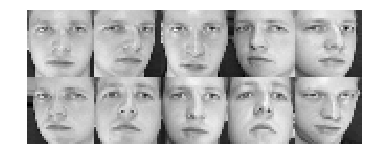

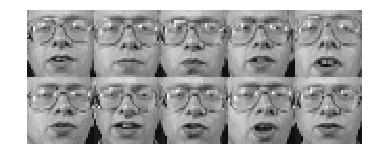

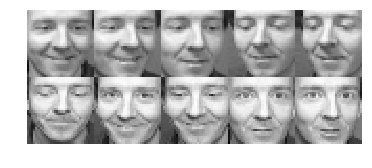

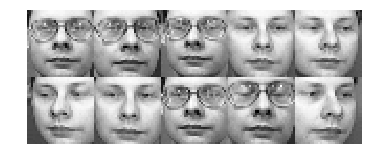

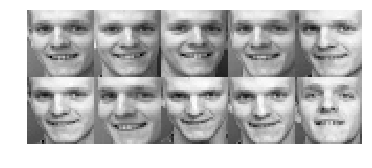

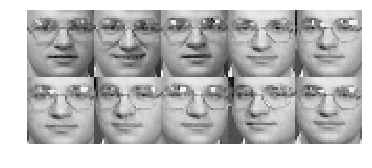

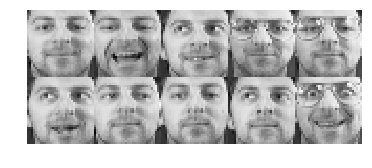

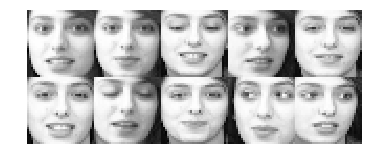

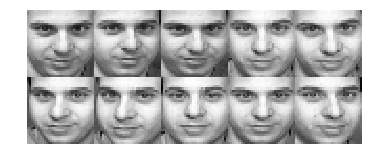

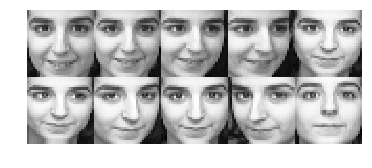

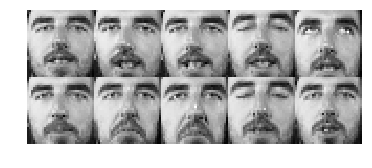

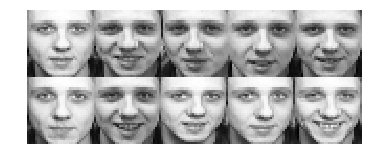

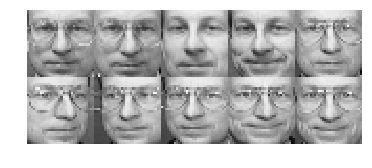

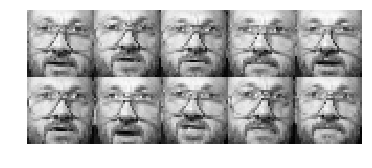

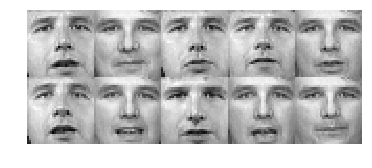

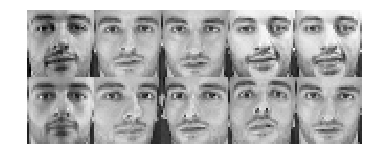

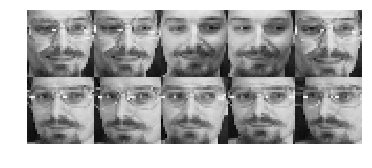

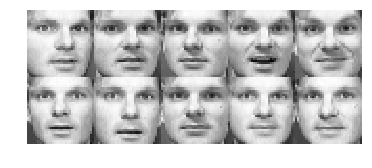

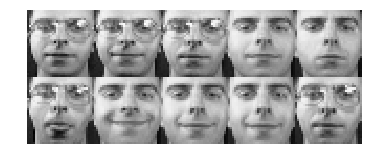

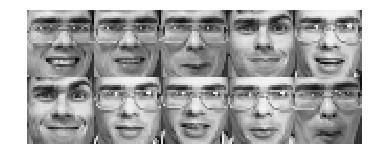

In [15]:
show_faces(data[0:10], num_per_row=5)
show_faces(data[10:20], num_per_row=5)
show_faces(data[20:30], num_per_row=5)
show_faces(data[30:40], num_per_row=5)
show_faces(data[40:50], num_per_row=5)
show_faces(data[50:60], num_per_row=5)
show_faces(data[60:70], num_per_row=5)
show_faces(data[70:80], num_per_row=5)
show_faces(data[80:90], num_per_row=5)
show_faces(data[90:100], num_per_row=5)
show_faces(data[100:110], num_per_row=5)
show_faces(data[110:120], num_per_row=5)
show_faces(data[120:130], num_per_row=5)
show_faces(data[130:140], num_per_row=5)
show_faces(data[140:150], num_per_row=5)
show_faces(data[150:160], num_per_row=5)
show_faces(data[160:170], num_per_row=5)
show_faces(data[170:180], num_per_row=5)
show_faces(data[180:190], num_per_row=5)
show_faces(data[190:200], num_per_row=5)

Analyse the classification results, and pick some subjects that are considered the most difficult to recognise by your classifier. Show and explain it to the TA.

### Experiment 3: Face Completion

Revise the “Regression Example II” on face completion in Chapter 2. The task is to guess the 512 pixels of the right face from the 512 pixels of the left face. 

The following command can be used to extract the left and right faces from the input data.

In [16]:
left, right = split_left_right(data)

And you can visualise them with the function `show_split_faces()`:

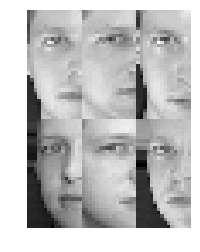

In [17]:
show_split_faces(left[:6, :], num_per_row=3)

Build a face completion model using your functions `l2_rls_train` and `l2_rls_predict`. Design an experiment to assess your model, which should include appropriate training and testing. Use mean absolute percentage error to evaluate the regression performance. You do not need to bother with hyper-parameter selection, but simply set $\lambda$=0.

Write your code below and make sure it compiles. Show your code to the TA, explain your model and experiment design, and demonstrate results.

In [18]:
# Your code goes here
tr_ind, te_ind = partition_data(labels, num_per_class=5)
tr_data = data[tr_ind, :]
tr_left, tr_right = split_left_right(tr_data)

te_data = data[te_ind, :]
te_left, te_right = split_left_right(te_data)

w = l2_rls_train(tr_left, tr_right, 0)
predicted_y = l2_rls_predict(w, te_left)


err = 0
for i in range(len(te_right)):
    for j in range(len(te_right[i])):
        err = err + np.absolute(predicted_y[i][j] - te_right[i][j]) / np.absolute(te_right[i][j])
mean_err = err / (len(te_right) * len(te_right[i]))
#err =  np.sum(predicted_y != te_right)


Visualise and compare the ground truth face (include both the left and right parts) and the completed face (include both the true left and predicted right parts) for 3 randomly chosen testing samples below. You can use `join_left_right(left, right)` to concatenate the left and right halves of a set of faces.

0.22653142044107405


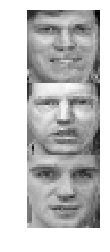

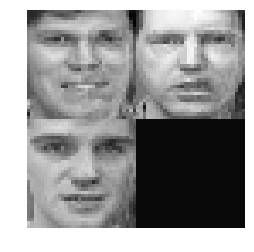

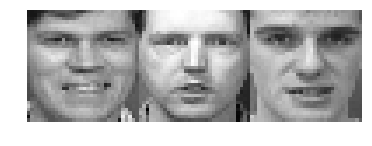

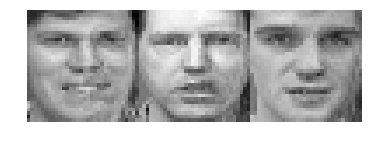

In [19]:
print(mean_err)
from random import randint
#show_split_faces(predicted_y[:3, :], num_per_row=3)
get_random_faces = np.random.choice(te_left[0], 3)
show_faces(join_left_right(te_left, predicted_y)[get_random_faces], num_per_row=1)
show_faces(join_left_right(te_left, predicted_y)[get_random_faces], num_per_row=2)
show_faces(join_left_right(te_left, te_right)[get_random_faces], num_per_row=3)
show_faces(join_left_right(te_left, predicted_y)[get_random_faces], num_per_row=3)

Does your model work well? Comment on it.